In [185]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [186]:
pd.options.display.max_columns = None
df = pd.read_csv('amazon_reviews.csv')
df.head()

,product_name,product_category,reviews
0,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Your browser does not support HTML5 video. I ...
1,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,OVERALL BANG FOR BUCK......BEST VFM Display :-...
2,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Spec - 4/5 Build- 4/5 Display-4/5 Overall it’s...
3,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,"1 Star for Amazon packaging, and 5 Star for pr..."
4,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Your browser does not support HTML5 video. I ...


In [187]:
df.describe(include = 'all')

,product_name,product_category,reviews
count,10360,10360,10356
unique,167,1,9461
top,HP-Graphics-14-inch-Windows-14s-dq2100TU,laptop,Good
freq,729,10360,130


In [188]:
df.isnull().sum()

product_name        0
product_category    0
reviews             4
dtype: int64

In [189]:
df.columns

Index(['product_name', 'product_category', 'reviews'], dtype='object')

In [190]:
df = df.dropna()

In [191]:
senti = SentimentIntensityAnalyzer()
senti

In [192]:
def polarity_score(text, ptype = 'pos'):
    score = senti.polarity_scores(text)
    neg, neu, pos, compound = np.round([score['neg'], score['neu'], score['pos'], score['compound']], 2)
    if ptype == 'pos': return pos
    elif ptype == 'neg' : return neg
    elif ptype == 'neu' : return neu
    elif ptype == 'comp' : return compound
    return pd.Series([neg, neu, pos, compound])

def get_sentiment(compound):
    if compound >= 0.05 : return 1
    elif compound <= -0.05 : return -1
    return 0

def best_worst_rev(x):
    pmax = x.pos.idxmax()
    nmax = x.neg.idxmax()
    best = x.reviews.loc[pmax]
    worst = x.reviews.loc[nmax]
    return pd.Series([best, worst])

def less_rev(x, tol = 5):
    # returns product name, product index, number of product reviews       
    less_rev_col = [] 
    for i in x:
        if i[1].shape[0] < tol:
            less_rev_col.append((i[0], i[1].index, i[1].shape[0]))
    
    return less_rev_col

In [193]:
df.head()

,product_name,product_category,reviews
0,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Your browser does not support HTML5 video. I ...
1,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,OVERALL BANG FOR BUCK......BEST VFM Display :-...
2,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Spec - 4/5 Build- 4/5 Display-4/5 Overall it’s...
3,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,"1 Star for Amazon packaging, and 5 Star for pr..."
4,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Your browser does not support HTML5 video. I ...


In [194]:
low_reviews = less_rev(df.groupby('product_name'))
low_reviews

[('ASUS-Dash-F15-15-6-inch-i7-11370H-FX516PC-HN063T',
  Int64Index([6245], dtype='int64'),
  1),
 ('ASUS-VivoBook-14-0-inch-i5-1035G1-X415JF-EB522TS',
  Int64Index([7617], dtype='int64'),
  1),
 ('ASUS-VivoBook-15-6-inch-Integrated-M513IA-BQ512TS',
  Int64Index([4397, 4398], dtype='int64'),
  2),
 ('ASUS-VivoBook-i3-1115G4-Integrated-X415EA-EK342TS',
  Int64Index([4989, 4990, 4991, 4992], dtype='int64'),
  4),
 ('ASUS-VivoBook14-Integrated-14-1-inch-M415DA-EB502TS',
  Int64Index([6926, 6927, 6928], dtype='int64'),
  3),
 ('Acer-Aspire-Intel-Generation-39-62',
  Int64Index([7943, 7944], dtype='int64'),
  2),
 ('Dell-Inspiron-3505-Integrated-D560361WIN9B',
  Int64Index([5613, 5614], dtype='int64'),
  2),
 ('Dell-Vostro-5415-Integrated-D552192WIN9S',
  Int64Index([9586, 9587, 9588, 9591], dtype='int64'),
  4),
 ('Dell-i3-1005G1-Display-D552151WIN9BE-Wireless',
  Int64Index([4993], dtype='int64'),
  1),
 ('HP-255-G8-3K1G7PA-Graphics',
  Int64Index([7550, 7551, 7552], dtype='int64'),
  3),


#### the above products have reviews less than 5 so lets drop them 

In [195]:
less_rev_cols = list(zip(*less_rev(df.groupby('product_name'))))[1]
less_rev_idx = []
for i in less_rev_cols:
    less_rev_idx += i.values.tolist() 

In [196]:
df = df.drop(less_rev_idx)
df.shape

(10309, 3)

In [197]:
df[['neg', 'neu', 'pos', 'total']] = df.reviews.apply(lambda x : polarity_score(x, 'all'))

In [198]:
df['sentiment'] = df.total.apply(get_sentiment)

In [199]:
df.head()

,product_name,product_category,reviews,neg,neu,pos,total,sentiment
0,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Your browser does not support HTML5 video. I ...,0.08,0.89,0.03,-0.39,-1
1,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,OVERALL BANG FOR BUCK......BEST VFM Display :-...,0.02,0.91,0.07,0.74,1
2,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Spec - 4/5 Build- 4/5 Display-4/5 Overall it’s...,0.00,0.73,0.27,0.97,1
3,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,"1 Star for Amazon packaging, and 5 Star for pr...",0.00,0.97,0.03,0.38,1
4,ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ...,laptop,Your browser does not support HTML5 video. I ...,0.08,0.89,0.03,-0.39,-1


In [200]:
# df.groupby('product_name').apply(best_worst_rev)

#### now let's get the most positive and negative review for each product also get the mean pos and neg score

In [201]:
new_df = df.groupby('product_name')[['neg','neu','pos','total']].apply(np.mean)
new_df['sentiment'] = new_df.total.apply(get_sentiment)
new_df[['top_pos_rev', 'top_neg_rev']] = df.groupby('product_name').apply(best_worst_rev)
new_df.head()

,neg,neu,pos,total,sentiment,top_pos_rev,top_neg_rev
product_name,,,,,,,
3593-15-6-inch-i5-1035G1-Microsoft-Integrated,0.046275,0.654902,0.298235,0.387059,1,Excellent.,Cheated us its WiFi is not working. CC is talk...
ASUS-15-6-inch-RTX-3050-Graphics-FA506IC-HN005T,0.068077,0.748077,0.184231,0.578077,1,Your browser does not support HTML5 video. Wo...,Your browser does not support HTML5 video.
ASUS-15-6-inch-i5-10300H-SSDWindows-FX566LH-BQ275T,0.054362,0.665885,0.279918,0.408930,1,Super,Battery is bad
ASUS-E410MA-EK319T-Pentium-NumberPad-Warranty,0.107000,0.606667,0.287333,0.350000,1,Value worth,No
ASUS-VivoBook-15-6-inch-Integrated-KM513UA-BQ513TS,0.060000,0.741000,0.200000,0.499000,1,Only brightness must be more. Performance of l...,Your browser does not support HTML5 video. My...


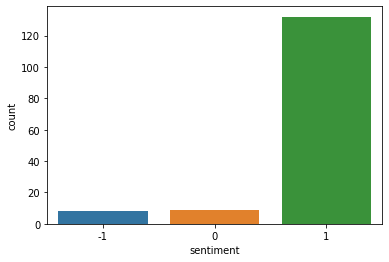

In [202]:
sns.countplot(new_df.sentiment);

#### let's see top positive and negative reviews for product that's hated by majority of the people

In [208]:
for i in new_df[['top_pos_rev','top_neg_rev']][new_df.sentiment == -1].index:
    print(f' {i} '.center(60, '='))
    print('\nPositive review : \n')
    print(new_df.loc[i, 'top_pos_rev'])
    print('\nNegative review : \n')
    print(new_df.loc[i, 'top_neg_rev'])
    print()

======== Acer-Aspire-Generation-Processor-15-6-inch ========

Positive review : 

Received promptly on time. Laptop is working nice. Seller is highly reputed. No issues so far. Product is really good.

Negative review : 

Worst product, the hard disc is not working within 10 days of purchase, service of the Company is poor not responding and attending the problem. Recommended, not to buy the product.

========== Dell-Latitude-3510-i3-10110U-Warranty ===========

Positive review : 

Look wise its good. Performance is fine for business purposes its getting heated beside the touch pad on top. Lite weight and screen view and camera is good.

Negative review : 

Performance is good but sound quality is bad

======== Dell-i3-1125G4-Inspiron-5410-D560531WIN9S =========

Positive review : 

Overall awesome

Negative review : 

Disappointed, slowest speed I seen ever, sigma dealer in Lko has poor performance , battery lost within 1yr, never buy

======== HP-Processor-15-6-inch-Laptop-15s-fq2071